In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data=pd.read_csv('/Users/saeedazad/Downloads/train.tsv', sep='\t')
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
train,test=train_test_split(data,test_size=0.2)
train.shape   , test.shape

((1186028, 8), (296507, 8))

In [4]:
#nan_train=train[train.isna().any(axis=1)]
mis_val=train.isnull().sum()
mis_val

train_id                  0
name                      0
item_condition_id         0
category_name          5018
brand_name           506182
price                     0
shipping                  0
item_description          4
dtype: int64

(array([2.21797e+05, 4.45584e+05, 2.24767e+05, 1.06493e+05, 6.02750e+04,
        3.60010e+04, 2.30600e+04, 1.46090e+04, 1.09730e+04, 6.94600e+03,
        6.66600e+03, 3.61000e+03, 3.85600e+03, 2.89400e+03, 2.11700e+03,
        2.72000e+03, 1.55300e+03, 1.31100e+03, 1.29600e+03, 7.71000e+02,
        1.52300e+03, 4.60000e+02, 6.61000e+02, 5.68000e+02, 3.35000e+02,
        7.28000e+02, 2.90000e+02, 2.97000e+02, 3.41000e+02, 1.66000e+02,
        4.81000e+02, 1.09000e+02, 1.60000e+02, 1.75000e+02, 1.32000e+02,
        3.08000e+02, 9.70000e+01, 8.50000e+01, 1.14000e+02, 5.80000e+01,
        2.32000e+02, 4.60000e+01, 6.30000e+01, 4.70000e+01, 2.30000e+01,
        1.53000e+02, 3.40000e+01, 3.70000e+01, 4.10000e+01, 6.40000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 39

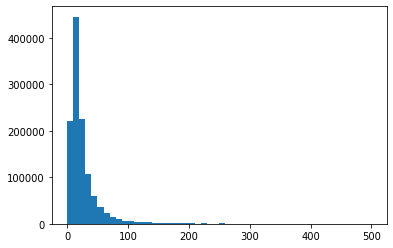

In [5]:
plt.hist(train['price'],bins=50,range=[0,500])


In [6]:
train['price'].describe()

count    1.186028e+06
mean     2.673389e+01
std      3.857566e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [7]:
train['shipping'].value_counts(normalize=True)*100

0    55.259488
1    44.740512
Name: shipping, dtype: float64

In [8]:
shipping_fee_by_seller=train.loc[train['shipping']==1,'price']
shipping_fee_by_buyer=train.loc[train.shipping==0,'price']
shipping_fee_by_buyer

183921      61.0
994585      14.0
1032226     76.0
941756      19.0
302517      12.0
           ...  
738407      16.0
1172136      9.0
1357548     54.0
289816     189.0
1183292     25.0
Name: price, Length: 655393, dtype: float64

No handles with labels found to put in legend.


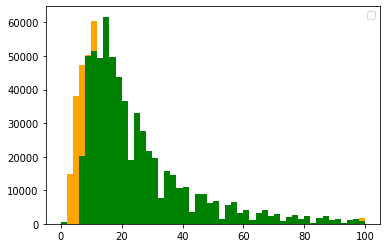

In [9]:
fig,ax=plt.subplots()
ax.hist(shipping_fee_by_seller,color='Orange',bins=50,range=[0,100])
ax.hist(shipping_fee_by_buyer,bins=50,color='Green',range=(0,100))
ax.legend()
plt.show()

In [10]:
train['item_condition_id'].value_counts(normalize=True)*100

1    43.224190
3    29.161706
2    25.302775
4     2.150539
5     0.160789
Name: item_condition_id, dtype: float64

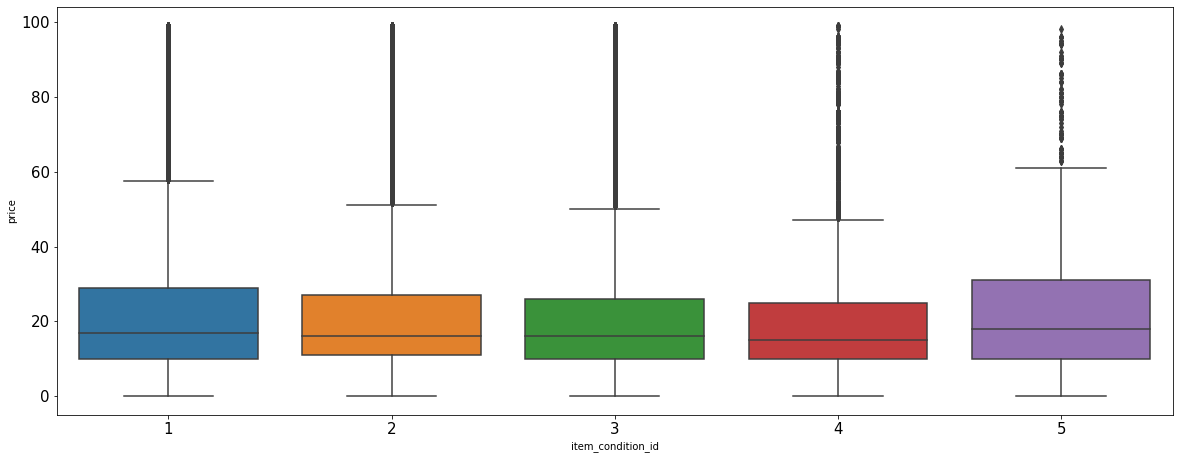

In [11]:
fig,ax=plt.subplots(figsize=(20,7.5))
price_100=train[train['price']<100]
sns.boxplot(x='item_condition_id',y='price',
            data=price_100,ax=ax)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)            
plt.show()

Text(0.5, 0.98, '')

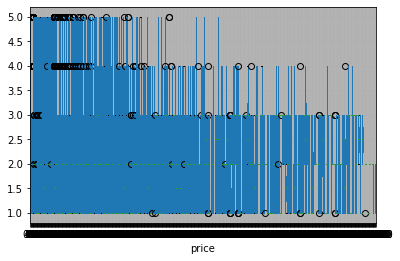

In [12]:
train.boxplot(column='item_condition_id',by='price')
plt.title('')
plt.suptitle('')

In [13]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [14]:
con = train[(train['item_condition_id']==5) & (train['price']>=20)]
con.head(6)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
723162,723162,2 bad shape Super Nintendo,5,Electronics/Video Games & Consoles/Consoles,Nintendo,34.0,1,Both of these worked the last time I checked b...
424922,424922,Gucci bamboo handle hand bag,5,Women/Women's Handbags/Other,Gucci,44.0,0,Good condition outside. Have some mark from st...
1257425,1257425,White MacBook Pro for Parts,5,Electronics/Computers & Tablets/Laptops & Netb...,Apple,35.0,1,I spilled coca-cola on this mac:( but I'm sure...
1021726,1021726,iPhone 6 space grey 64gb,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,91.0,0,PRICE IS FIRM! Please do not ask for lower. FI...
908367,908367,Iphone 5s for PARTS ONLY,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,25.0,1,Iphone 5s with T-Mobile is good for parts only...
1444592,1444592,Defective galaxys6 edge and broke phones,5,Electronics/Cell Phones & Accessories/Cell Pho...,NaN,46.0,0,Galaxy s6 edge is Cracked and defective but st...


In [15]:
train['category_name'].value_counts(normalize=True)*100

Women/Athletic Apparel/Pants, Tights, Leggings    4.085571
Women/Tops & Blouses/T-Shirts                     3.143919
Beauty/Makeup/Face                                2.328769
Beauty/Makeup/Lips                                2.035122
Electronics/Video Games & Consoles/Games          1.807097
                                                    ...   
Handmade/Toys/Bear                                0.000085
Handmade/Quilts/Patchwork                         0.000085
Vintage & Collectibles/Furniture/Shelf            0.000085
Handmade/Art/Aceo                                 0.000085
Other/Pet Supplies/Pet Food                       0.000085
Name: category_name, Length: 1270, dtype: float64

In [16]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [17]:
train['category_name'].head()

183921     Electronics/TV, Audio & Surveillance/Headphones
994585                                 Women/Shoes/Sandals
1032226                   Other/Books/Education & Teaching
419291                             Kids/Toys/Arts & Crafts
941756                            Women/Swimwear/One-Piece
Name: category_name, dtype: object

In [18]:
def split_category(x):
    try:return x.split('/')[0]
    except:return('unknown_category')

In [19]:
main_category = train['category_name'].apply(lambda x:split_category(x))
main_category

183921     Electronics
994585           Women
1032226          Other
419291            Kids
941756           Women
              ...     
985416           Women
289816     Electronics
99368           Beauty
1183292            Men
1369686           Home
Name: category_name, Length: 1186028, dtype: object

In [20]:
def lower_case(x):
    try:return x.lower()
    except:return ('unknown Category')


main_category_lower = train['category_name'].apply(lambda x:lower_case(x))
main_category_lower

183921     electronics/tv, audio & surveillance/headphones
994585                                 women/shoes/sandals
1032226                   other/books/education & teaching
419291                             kids/toys/arts & crafts
941756                            women/swimwear/one-piece
                                ...                       
985416                   women/coats & jackets/jean jacket
289816     electronics/tv, audio & surveillance/headphones
99368                beauty/tools & accessories/nail tools
1183292                      men/men's accessories/wallets
1369686                              home/artwork/drawings
Name: category_name, Length: 1186028, dtype: object

In [21]:
def split_cat(text):
    try:return text.split("/")
    except:return ("Category Unknown","Category Unknown", "Category Unknown")


In [22]:
train['category_name'].dtypes

dtype('O')

In [23]:
train['main_cat'],train['subcat_1'],train['subcat_2'] =zip(*train['category_name'].apply(lambda x: split_cat(x)))
test['main_cat'],test['subcat_1'],test['subcat_2']=zip(*test['category_name'].apply(lambda x:split_cat(x)))
                                                                    
                                                             
                                                                 

<ipython-input-23-665dc53d3087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['main_cat'],train['subcat_1'],train['subcat_2'] =zip(*train['category_name'].apply(lambda x: split_cat(x)))
<ipython-input-23-665dc53d3087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['main_cat'],test['subcat_1'],test['subcat_2']=zip(*test['category_name'].apply(lambda x:split_cat(x)))


In [24]:
test

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
1018027,1018027,Makeup Bundle Set,1,Beauty/Makeup/Makeup Sets,NaN,20.0,1,New Makeup Bundle set !,Beauty,Makeup,Makeup Sets
1130224,1130224,VS PINK BLING HOODIE,2,Women/Sweaters/Full Zip,PINK,26.0,0,LIKE NEW. VS PINK BLING HOODIE. NO MISSING SEQ...,Women,Sweaters,Full Zip
1170083,1170083,Blue Haze Slime (4oz),1,Kids/Toys/Arts & Crafts,NaN,3.0,1,Blue Haze Thick milky Slime with blue coloring...,Kids,Toys,Arts & Crafts
716488,716488,Ear/Nose Piercing Kit,1,Women/Jewelry/Earrings,NaN,19.0,0,"Brand new, never used. Kit includes -piercing ...",Women,Jewelry,Earrings
760830,760830,Nintendo DS - Lego Star Wars Saga,3,Electronics/Video Games & Consoles/Games,Nintendo,10.0,0,Nintendo DS - Lego Star Wars the Complete Saga...,Electronics,Video Games & Consoles,Games
...,...,...,...,...,...,...,...,...,...,...,...
790964,790964,RESERVED FOR SRAM12,1,Women/Dresses/Knee-Length,NaN,11.0,1,The colors in this unique boho dress are beaut...,Women,Dresses,Knee-Length
1097849,1097849,Yeti Mic,3,NaN,NaN,79.0,0,coming with and arm the original stand and box...,Category Unknown,Category Unknown,Category Unknown
370076,370076,"Koko lashes in ""Goddess""",1,Beauty/Makeup/Eyes,NaN,34.0,1,"3 ""Goddess"" koko lashes. Brand new, never been...",Beauty,Makeup,Eyes
160067,160067,Tiffany Somerset bracelet,2,Women/Jewelry/Bracelets,Tiffany & Co.,134.0,0,"7"" not adjustable sterling Silver. Lightly use...",Women,Jewelry,Bracelets


In [25]:
def lowercase_categorial_features_train(feature):
    original_list = list(train[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list

def lowercase_categorial_features_test(feature):
    original_list = list(test[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list    
            
    

In [26]:
train['main_cat'] = lowercase_categorial_features_train('main_cat')
train['subcat_1'] = lowercase_categorial_features_train('subcat_1')
train['subcat_2'] = lowercase_categorial_features_train('subcat_2')


<ipython-input-26-3c88c417541f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['main_cat'] = lowercase_categorial_features_train('main_cat')
<ipython-input-26-3c88c417541f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['subcat_1'] = lowercase_categorial_features_train('subcat_1')
<ipython-input-26-3c88c417541f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [27]:
test['main_cat'] = lowercase_categorial_features_test('main_cat')
test['subcat_1'] = lowercase_categorial_features_test('subcat_1')
test['subcat_2'] = lowercase_categorial_features_test('subcat_2')


<ipython-input-27-6eb4188c524f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['main_cat'] = lowercase_categorial_features_test('main_cat')
<ipython-input-27-6eb4188c524f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['subcat_1'] = lowercase_categorial_features_test('subcat_1')
<ipython-input-27-6eb4188c524f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [28]:
test.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
1018027,1018027,Makeup Bundle Set,1,Beauty/Makeup/Makeup Sets,NaN,20.0,1,New Makeup Bundle set !,beauty,makeup,makeup sets
1130224,1130224,VS PINK BLING HOODIE,2,Women/Sweaters/Full Zip,PINK,26.0,0,LIKE NEW. VS PINK BLING HOODIE. NO MISSING SEQ...,women,sweaters,full zip
1170083,1170083,Blue Haze Slime (4oz),1,Kids/Toys/Arts & Crafts,NaN,3.0,1,Blue Haze Thick milky Slime with blue coloring...,kids,toys,arts & crafts
716488,716488,Ear/Nose Piercing Kit,1,Women/Jewelry/Earrings,NaN,19.0,0,"Brand new, never used. Kit includes -piercing ...",women,jewelry,earrings
760830,760830,Nintendo DS - Lego Star Wars Saga,3,Electronics/Video Games & Consoles/Games,Nintendo,10.0,0,Nintendo DS - Lego Star Wars the Complete Saga...,electronics,video games & consoles,games


In [29]:
train['main_cat'].value_counts(normalize=True)*100

women                     44.821033
beauty                    14.026650
kids                      11.589102
electronics                8.277039
men                        6.310728
home                       4.567767
vintage & collectibles     3.141241
other                      3.051952
handmade                   2.084184
sports & outdoors          1.707211
category unknown           0.423093
Name: main_cat, dtype: float64

In [30]:
main_cat = train.groupby('main_cat')
main_cat_price_median = pd.DataFrame(main_cat['price'].median()).sort_values(ascending = False,by='price')
main_cat_price_median.price

main_cat
men                       21.0
women                     19.0
home                      18.0
category unknown          16.0
sports & outdoors         16.0
vintage & collectibles    16.0
beauty                    15.0
electronics               15.0
kids                      14.0
other                     14.0
handmade                  12.0
Name: price, dtype: float64

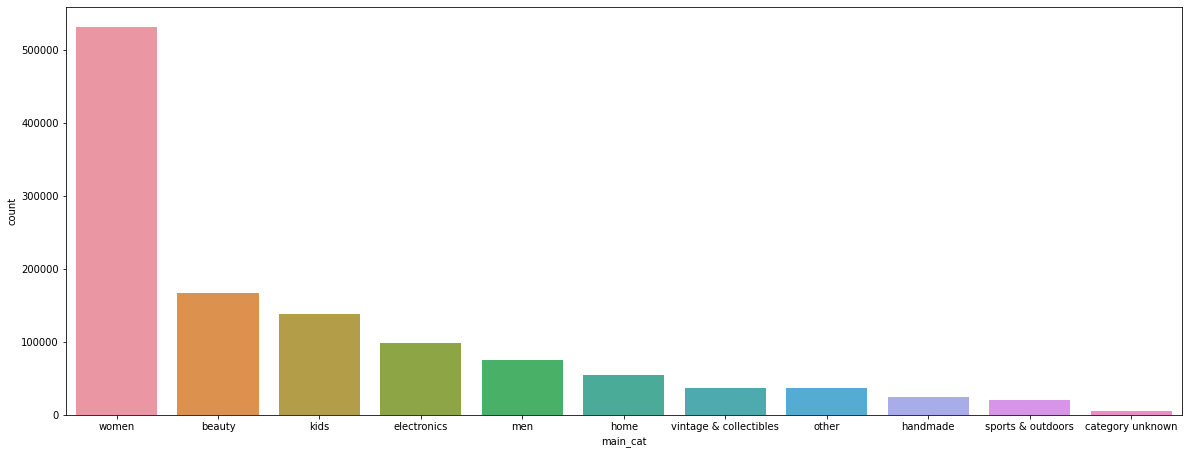

In [31]:
fig,ax=plt.subplots(figsize=(20,7.5))
sns.countplot(train['main_cat'],order=(train['main_cat'].value_counts()).index)
plt.show()

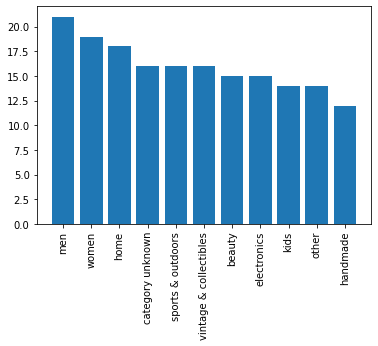

In [32]:
#ind=list(train['main_cat'].unique())
plt.bar(list(main_cat_price_median.index),list(main_cat_price_median.price))
plt.xticks(rotation='vertical')
plt.show()

In [33]:
main_cat=train.groupby('main_cat')
len(main_cat)

11

In [34]:
main_cat_median = pd.DataFrame(main_cat['price'].median())
main_cat_median

,price
main_cat,
beauty,15.0
category unknown,16.0
electronics,15.0
handmade,12.0
home,18.0
kids,14.0
men,21.0
other,14.0
sports & outdoors,16.0


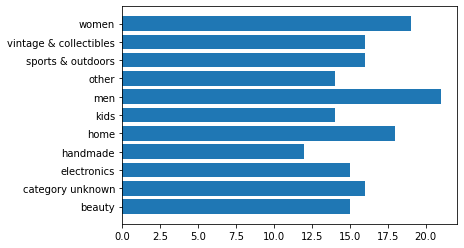

In [35]:
plt.barh(range(0,len(main_cat_median)),main_cat_median['price'])
plt.yticks(range(0,len(main_cat_median)),main_cat_median.index,
           fontsize=10)
plt.show()

In [36]:
train['subcat_1'].value_counts(normalize=True)*100

athletic apparel         9.080393
makeup                   8.417255
tops & blouses           7.221752
shoes                    6.757429
jewelry                  4.173342
                           ...   
blazers & sport coats    0.004553
ceramics and pottery     0.003626
dolls and miniatures     0.003120
books and zines          0.002698
quilts                   0.001855
Name: subcat_1, Length: 114, dtype: float64

In [37]:
paper=train[train['subcat_1']=='paper goods']
paper.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
1334221,1334221,17 sheets Pokemon stickers,1,Handmade/Paper Goods/Sticker,NaN,5.0,1,SHIPS THURSDAY AFTER PURCHASE,handmade,paper goods,sticker
1127825,1127825,DIY Art/Craft Bundle,3,Handmade/Paper Goods/Scrapbooking,NaN,14.0,1,Included : 2 books (several occasion)CARDS Kid...,handmade,paper goods,scrapbooking
602465,602465,NEW STAMPENDOUS MAKE IT POP CUTTING DIES,1,Handmade/Paper Goods/Scrapbooking,NaN,10.0,1,NEW MAKE IT POP CUTTING DIES (SET OF 12 DIES) ...,handmade,paper goods,scrapbooking
1308873,1308873,Blues lives matter decal,1,Handmade/Paper Goods/Sticker,NaN,3.0,1,[rm] each,handmade,paper goods,sticker
1411446,1411446,Wine decal yeti tumbler rambler cup,1,Handmade/Paper Goods/Sticker,NaN,4.0,1,3x3 custom decal. ** [rm] per inch if you want...,handmade,paper goods,sticker


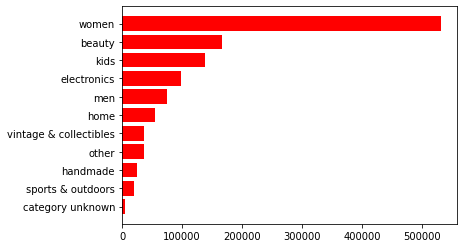

In [38]:
x = train['main_cat'].value_counts().index[:11]
y = train['main_cat'].value_counts().values[:11]
plt.yticks(range(len(x),0,-1),x,fontsize=10)
plt.barh(range(len(x),0,-1),y,color='red')
plt.show()

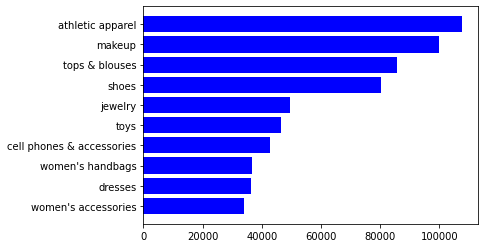

In [39]:
x = train['subcat_1'].value_counts().index[:10]
y = train['subcat_1'].value_counts().values[:10]
#plt.barh(range(0,len(x)),y,color='Green')
#plt.yticks(range(0,len(x)),x)
plt.barh(range(len(x),0,-1),y,color='blue')
plt.yticks(range(len(x),0,-1),x,fontsize=10)
plt.show()

In [40]:
x

Index(['athletic apparel', 'makeup', 'tops & blouses', 'shoes', 'jewelry',
       'toys', 'cell phones & accessories', 'women's handbags', 'dresses',
       'women's accessories'],
      dtype='object')

In [41]:
len(x)

10

In [42]:
subcat_1=train.groupby('subcat_1')
subcat_1_median = pd.DataFrame(subcat_1['price'].median())
subcat_1_median = subcat_1_median.sort_values(ascending=True,by='price')
subcat_1_median

,price
subcat_1,
paper goods,6.0
quilts,7.5
trading cards,8.0
magazines,9.0
children,9.0
...,...
suits,30.0
women's handbags,31.0
strollers,36.0


In [43]:
len(subcat_1)

114

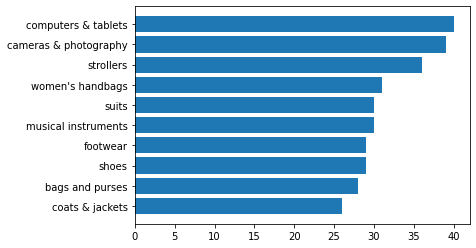

In [44]:
subcat_1_median_top=subcat_1_median[-10:]
plt.barh(range(0,len(subcat_1_median_top)),subcat_1_median_top.price)
plt.yticks(range(0,len(subcat_1_median_top)),subcat_1_median_top.index)
plt.show()

In [45]:
subcat_1_median.index

Index(['paper goods', 'quilts', 'trading cards', 'magazines', 'children',
       'geekery', 'books and zines', 'needlecraft', 'accessories', 'art',
       ...
       'coats & jackets', 'bags and purses', 'shoes', 'footwear',
       'musical instruments', 'suits', 'women's handbags', 'strollers',
       'cameras & photography', 'computers & tablets'],
      dtype='object', name='subcat_1', length=114)

In [46]:
train['brand_name'].value_counts(normalize=True)*100

Nike                        6.387182
PINK                        6.366736
Victoria's Secret           5.655693
LuLaRoe                     3.655975
Apple                       2.048258
                              ...   
B-Low the Belt              0.000147
Revlon Group                0.000147
Edu Science                 0.000147
Pink Lotus                  0.000147
A.B.S. by Allen Schwartz    0.000147
Name: brand_name, Length: 4533, dtype: float64

In [47]:
train['brand_name'].nunique()

4533

In [48]:
nan_df=train['brand_name'].isna().sum()
nan_df

506182

In [49]:
train['brand_name'] = train['brand_name'].fillna('brand_unavailable')

<ipython-input-49-572f8a3430b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['brand_name'] = train['brand_name'].fillna('brand_unavailable')


In [50]:
test['brand_name'] = test['brand_name'].fillna('brand_Unavailable')

<ipython-input-50-f4dc4acfcc77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['brand_name'] = test['brand_name'].fillna('brand_Unavailable')


In [51]:
brand = list(test['brand_name'].values)
brand_name_given=[]
for i in brand:
    if i=='brand_unavailable':
        brand_name_given.append('No')
    else:
        brand_name_given.append('Yes')
test['brand_name_given']=brand_name_given        

<ipython-input-51-371c6f6dd638>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['brand_name_given']=brand_name_given


In [52]:
test.loc[test['brand_name']=='brand_Unavailable','brand_name']='brand_unavailable'
test

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given
1018027,1018027,Makeup Bundle Set,1,Beauty/Makeup/Makeup Sets,brand_unavailable,20.0,1,New Makeup Bundle set !,beauty,makeup,makeup sets,Yes
1130224,1130224,VS PINK BLING HOODIE,2,Women/Sweaters/Full Zip,PINK,26.0,0,LIKE NEW. VS PINK BLING HOODIE. NO MISSING SEQ...,women,sweaters,full zip,Yes
1170083,1170083,Blue Haze Slime (4oz),1,Kids/Toys/Arts & Crafts,brand_unavailable,3.0,1,Blue Haze Thick milky Slime with blue coloring...,kids,toys,arts & crafts,Yes
716488,716488,Ear/Nose Piercing Kit,1,Women/Jewelry/Earrings,brand_unavailable,19.0,0,"Brand new, never used. Kit includes -piercing ...",women,jewelry,earrings,Yes
760830,760830,Nintendo DS - Lego Star Wars Saga,3,Electronics/Video Games & Consoles/Games,Nintendo,10.0,0,Nintendo DS - Lego Star Wars the Complete Saga...,electronics,video games & consoles,games,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
790964,790964,RESERVED FOR SRAM12,1,Women/Dresses/Knee-Length,brand_unavailable,11.0,1,The colors in this unique boho dress are beaut...,women,dresses,knee-length,Yes
1097849,1097849,Yeti Mic,3,NaN,brand_unavailable,79.0,0,coming with and arm the original stand and box...,category unknown,category unknown,category unknown,Yes
370076,370076,"Koko lashes in ""Goddess""",1,Beauty/Makeup/Eyes,brand_unavailable,34.0,1,"3 ""Goddess"" koko lashes. Brand new, never been...",beauty,makeup,eyes,Yes
160067,160067,Tiffany Somerset bracelet,2,Women/Jewelry/Bracelets,Tiffany & Co.,134.0,0,"7"" not adjustable sterling Silver. Lightly use...",women,jewelry,bracelets,Yes


In [53]:
nan_df = train['brand_name'].isna().sum()
nan_df

0

In [54]:
test['brand_name'] = lowercase_categorial_features_test('brand_name')

<ipython-input-54-7b7ec73e9ff4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['brand_name'] = lowercase_categorial_features_test('brand_name')


In [55]:
train['brand_name'] = train['brand_name'].fillna('brand_unavailable')
brand = list(train['brand_name'].values)
brand_name_given =[]
for i in brand:
    if i=='brand_unavailable':
        brand_name_given.append('No')
    else:
        brand_name_given.append('Yes')
train['brand_name_given'] = brand_name_given        


<ipython-input-55-65317dbc1c20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['brand_name'] = train['brand_name'].fillna('brand_unavailable')
<ipython-input-55-65317dbc1c20>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['brand_name_given'] = brand_name_given


In [56]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given
183921,183921,Beats by Dr. Dre Studio Headphones,2,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,61.0,0,Limited Edition Color. Beats Studio -Noise Can...,electronics,"tv, audio & surveillance",headphones,Yes
994585,994585,Hush Puppies Shoes Sandals 7.5 black low,3,Women/Shoes/Sandals,Hush Puppies,14.0,0,Price is firm. Hush Puppies Shoes Sandals Sz 7...,women,shoes,sandals,Yes
1032226,1032226,Discovering Psychology textbook,1,Other/Books/Education & Teaching,brand_unavailable,76.0,0,Brand new Never even opened NWT,other,books,education & teaching,No
419291,419291,Crazy Aarons Thinking Putty,3,Kids/Toys/Arts & Crafts,brand_unavailable,10.0,1,Made in the USA. Super Lava Color. Tin may be ...,kids,toys,arts & crafts,No
941756,941756,Sunny Co. Pamela Suit in Black,1,Women/Swimwear/One-Piece,brand_unavailable,19.0,0,This is the Sunny Co. Clothing Pamela One-Piec...,women,swimwear,one-piece,No
...,...,...,...,...,...,...,...,...,...,...,...,...
985416,985416,Juniors coat bongo brand fs,3,Women/Coats & Jackets/Jean Jacket,Bongo,13.0,1,Bongo coat Size xl Juniors leather like outsid...,women,coats & jackets,jean jacket,Yes
289816,289816,Beats by Dr. Dre Studio 2.0 Wireless,1,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,189.0,0,Beats by Dr. Dre Studio 2.0 Wireless Headband ...,electronics,"tv, audio & surveillance",headphones,Yes
99368,99368,Professional Style UV Light Nail Dryer,2,Beauty/Tools & Accessories/Nail Tools,brand_unavailable,45.0,1,Melody Susie UV Light Nail Dryer Large enough ...,beauty,tools & accessories,nail tools,No
1183292,1183292,Polo Wallet,1,Men/Men's Accessories/Wallets,Polo Ralph Lauren,25.0,0,No description yet,men,men's accessories,wallets,Yes


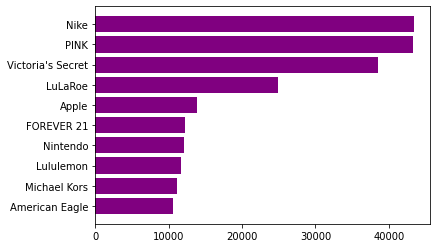

In [57]:
brand_filled=train[train['brand_name']!='brand_unavailable']
x = brand_filled['brand_name'].value_counts().index[:10]
y = brand_filled['brand_name'].value_counts().values[0:10]
plt.barh(range(len(x),0,-1),y,color ='purple')
plt.yticks(range(len(x),0,-1),x,fontsize=10)
plt.show()

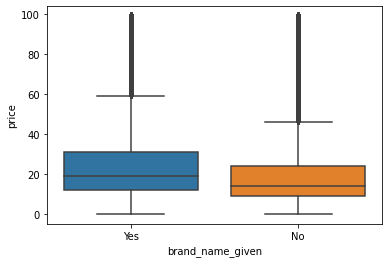

In [58]:
price_100 = train[train['price']<100]
sns.boxplot(x='brand_name_given', y='price', data=price_100)
plt.show()

In [59]:
brand_given = train.groupby('brand_name_given')
brand_given_median = pd.DataFrame(brand_given['price'].describe())
brand_given_median

,count,mean,std,min,25%,50%,75%,max
brand_name_given,,,,,,,,
No,506182.0,21.116138,27.236618,0.0,9.0,14.0,24.0,2000.0
Yes,679846.0,30.916616,44.751685,0.0,12.0,20.0,34.0,2009.0


In [60]:
train.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given
183921,183921,Beats by Dr. Dre Studio Headphones,2,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,61.0,0,Limited Edition Color. Beats Studio -Noise Can...,electronics,"tv, audio & surveillance",headphones,Yes
994585,994585,Hush Puppies Shoes Sandals 7.5 black low,3,Women/Shoes/Sandals,Hush Puppies,14.0,0,Price is firm. Hush Puppies Shoes Sandals Sz 7...,women,shoes,sandals,Yes
1032226,1032226,Discovering Psychology textbook,1,Other/Books/Education & Teaching,brand_unavailable,76.0,0,Brand new Never even opened NWT,other,books,education & teaching,No
419291,419291,Crazy Aarons Thinking Putty,3,Kids/Toys/Arts & Crafts,brand_unavailable,10.0,1,Made in the USA. Super Lava Color. Tin may be ...,kids,toys,arts & crafts,No
941756,941756,Sunny Co. Pamela Suit in Black,1,Women/Swimwear/One-Piece,brand_unavailable,19.0,0,This is the Sunny Co. Clothing Pamela One-Piec...,women,swimwear,one-piece,No
302517,302517,School Supplies,1,Other/Office supplies/School Supplies,brand_unavailable,12.0,0,• 2 college ruled notebooks • 4 folders No fre...,other,office supplies,school supplies,No
218954,218954,Cool Water Mens Cologne,1,Beauty/Fragrance/Men,brand_unavailable,27.0,0,Cool Water by Davidoff. Men's cologne. Fresh s...,beauty,fragrance,men,No
293996,293996,2t light pink petal dress,1,Kids/Girls 2T-5T/Dresses,brand_unavailable,8.0,0,ADORABLE WITH LEGGINGS !! Smoke and pet free h...,kids,girls 2t-5t,dresses,No
252696,252696,Newsboy Hat 2T - 4T,3,Kids/Boys 2T-5T/Accessories,The Children's Place,7.0,0,Children's Place newsboy hat size 2T - 4T. A c...,kids,boys 2t-5t,accessories,Yes
522153,522153,Polo Shirt,3,"Men/Tops/Polo, Rugby",Polo Ralph Lauren,19.0,0,- White Polo with collar - Blue polo logo - li...,men,tops,"polo, rugby",Yes


In [61]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url,sep=';')

In [62]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [63]:
bankData.groupby(['housing','y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [64]:
bankData.groupby(['loan','y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [65]:
balance_con= bankData[bankData['balance']>1000]

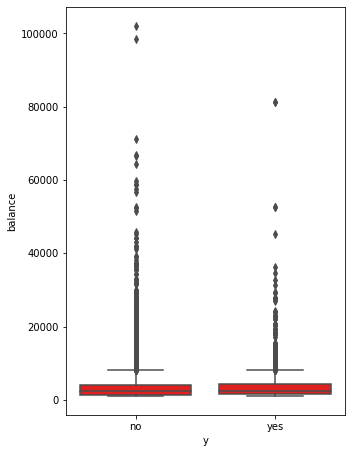

In [66]:
fig,ax=plt.subplots(figsize=(5,7.5))
sns.boxplot(x='y',y='balance',data=balance_con,color='red')
plt.show()

In [67]:
term_value = bankData.groupby('y')
term_value_median = pd.DataFrame(term_value['balance'].describe())
term_value_median

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
yes,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


In [68]:
np.quantile(bankData['balance'],[0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [69]:
bankData['balanceClass'] = 'Quant1'
bankData.loc[(bankData['balance']>72) & (bankData['balance']<448),
             'balanceClass'] = 'Quant2'
bankData.loc[(bankData['balance']>448) & (bankData['balance']<1428),
             'balanceClass'] = 'Quant3'
bankData.loc[(bankData['balance']>1428) ,'balanceClass'] = 'Quant4'
             

In [70]:
df1=bankData.groupby(['balanceClass','y'])['y'].agg(balancP='count').reset_index()
df2=bankData.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()

In [71]:
df3=pd.merge(df1,df2,on='balanceClass')
df3

,balanceClass,y,balancP,balanceTot
0,Quant1,no,10517,11340
1,Quant1,yes,823,11340
2,Quant2,no,10049,11275
3,Quant2,yes,1226,11275
4,Quant3,no,9884,11299
5,Quant3,yes,1415,11299
6,Quant4,no,9472,11297
7,Quant4,yes,1825,11297


In [72]:
df3['balancePercentage']=(df3.balancP/df3.balanceTot)*100
df3

,balanceClass,y,balancP,balanceTot,balancePercentage
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


In [73]:
x = bankData[['balance']].values.astype(float)
x

array([[2.143e+03],
       [2.900e+01],
       [2.000e+00],
       ...,
       [5.715e+03],
       [6.680e+02],
       [2.971e+03]])

In [74]:
from sklearn import preprocessing

In [75]:
minmaxScaler = preprocessing.MinMaxScaler()
bankData['balanceTran'] = minmaxScaler.fit_transform(x)
bankData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Quant3,0.080293
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Quant4,0.088501
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Quant4,0.124689
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Quant3,0.078868


In [76]:
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

In [77]:
bankData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Quant3,0.080303
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Quant4,0.088511
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Quant4,0.124699
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Quant3,0.078878


In [78]:
x = [5]
y = [x*x for x in x]
y

[25]

In [79]:
bankData ['loanTran']=1
bankData.loc[bankData['loan'] == 'no','loanTran'] = 5
bankData ['houseTran']=1
bankData.loc[bankData['housing']=='yes','houseTran'] =5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


In [80]:
bankData['assetIndex']= bankData['balanceTran']*bankData['houseTran']*bankData['loanTran']

In [81]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


In [82]:
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [83]:
bankData.loc[(bankData['assetIndex']>0.38) &(bankData['assetIndex']<0.57),
             'assetClass'] ='Quant2'

In [84]:
bankData.loc[(bankData['assetIndex']>0.57) &(bankData['assetIndex']<1.9),
             'assetClass'] ='Quant3'

bankData.loc[bankData['assetIndex']>1.9,'assetClass'] = 'Quant4'

In [85]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,NaN
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,NaN


In [86]:
bankData.groupby(['assetClass','y'])['y'].agg(assetTot='count').reset_index()

,assetClass,y,assetTot
0,Quant2,no,8436
1,Quant2,yes,1964
2,Quant3,no,10144
3,Quant3,yes,977
4,Quant4,no,10421
5,Quant4,yes,1057


In [87]:
dummy_df = pd.DataFrame({'Country':['France','Iran','Australia','Germany']})
dummy_df

,Country
0,France
1,Iran
2,Australia
3,Germany


In [88]:
pd.get_dummies(dummy_df['Country'],prefix='country')

,country_Australia,country_France,country_Germany,country_Iran
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0


In [89]:
train.head(4)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given
183921,183921,Beats by Dr. Dre Studio Headphones,2,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,61.0,0,Limited Edition Color. Beats Studio -Noise Can...,electronics,"tv, audio & surveillance",headphones,Yes
994585,994585,Hush Puppies Shoes Sandals 7.5 black low,3,Women/Shoes/Sandals,Hush Puppies,14.0,0,Price is firm. Hush Puppies Shoes Sandals Sz 7...,women,shoes,sandals,Yes
1032226,1032226,Discovering Psychology textbook,1,Other/Books/Education & Teaching,brand_unavailable,76.0,0,Brand new Never even opened NWT,other,books,education & teaching,No
419291,419291,Crazy Aarons Thinking Putty,3,Kids/Toys/Arts & Crafts,brand_unavailable,10.0,1,Made in the USA. Super Lava Color. Tin may be ...,kids,toys,arts & crafts,No


In [90]:
train.to_pickle('mercari_train.pkl')
pd.read_pickle('mercari_train')

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given,clean_description,price_q
142880,142880,It cosmetics cc cream shade medium,2,Beauty/Makeup/Face,brand_unavailable,18.0,1,It cosmetics cc cream shade medium Use 1-2x 90...,beauty,makeup,face,No,cosmetics cc cream shade medium use 1 2x 90 fu...,third_q
1448692,1448692,New Rae Dunn Coffee Canister,1,Home/Kitchen & Dining/Coffee & Tea Accessories,Rae Dunn,51.0,0,New Rae Dunn coffee canister. Please see pic a...,home,kitchen & dining,coffee & tea accessories,Yes,new rae dunn coffee canister please see pic re...,fourth_q
971797,971797,Mk toddler shoes girls,1,Kids/Boys 2T-5T/Shoes,brand_unavailable,26.0,0,New with taggs,kids,boys 2t-5t,shoes,No,new taggs,third_q
390676,390676,Harley Davidson long sleeve shirt,3,Men/Tops/T-shirts,Harley-Davidson,17.0,0,Harley Davidson longsleeve shirt. Size-LARGE C...,men,tops,t-shirts,Yes,harley davidson longsleeve shirt size large co...,second_q
173752,173752,Gold Cross Dangle Earrings,2,Women/Jewelry/Earrings,brand_unavailable,7.0,0,No description yet,women,jewelry,earrings,No,description yet,first_q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948248,948248,Digital Voice Recorder,1,"Electronics/TV, Audio & Surveillance/Portable ...",brand_unavailable,11.0,1,No description yet,electronics,"tv, audio & surveillance",portable audio & accessories,No,description yet,second_q
840161,840161,Lularoe OS birds,2,"Women/Athletic Apparel/Pants, Tights, Leggings",brand_unavailable,14.0,1,Never worn! I'm also open to reasonable offers.,women,athletic apparel,"pants, tights, leggings",No,never worn also open reasonable offers,second_q
993865,993865,Bohemian Elephant Clutch,2,Vintage & Collectibles/Bags and Purses/Clutch,brand_unavailable,8.0,1,EC beaded zippered pouch clutch bag coin makeu...,vintage & collectibles,bags and purses,clutch,No,ec beaded zippered pouch clutch bag coin makeu...,first_q
500393,500393,21 day fix 2 set DVD beachbody workout,2,Electronics/Media/DVD,brand_unavailable,22.0,0,Opened but never used (unfortunately) set of 2...,electronics,media,dvd,No,opened never used unfortunately set 21 day fix...,third_q


In [91]:
x_train = train.drop(['price'], axis=1)
x_test = test.drop(['price'],axis=1)

In [92]:
x_train.head(5)

,train_id,name,item_condition_id,category_name,brand_name,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given
183921,183921,Beats by Dr. Dre Studio Headphones,2,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,0,Limited Edition Color. Beats Studio -Noise Can...,electronics,"tv, audio & surveillance",headphones,Yes
994585,994585,Hush Puppies Shoes Sandals 7.5 black low,3,Women/Shoes/Sandals,Hush Puppies,0,Price is firm. Hush Puppies Shoes Sandals Sz 7...,women,shoes,sandals,Yes
1032226,1032226,Discovering Psychology textbook,1,Other/Books/Education & Teaching,brand_unavailable,0,Brand new Never even opened NWT,other,books,education & teaching,No
419291,419291,Crazy Aarons Thinking Putty,3,Kids/Toys/Arts & Crafts,brand_unavailable,1,Made in the USA. Super Lava Color. Tin may be ...,kids,toys,arts & crafts,No
941756,941756,Sunny Co. Pamela Suit in Black,1,Women/Swimwear/One-Piece,brand_unavailable,0,This is the Sunny Co. Clothing Pamela One-Piec...,women,swimwear,one-piece,No


In [93]:
from sklearn.preprocessing import OneHotEncoder   
def onehot_encoding(feature):
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_onehot = encoder.fit_transform(x_train[feature].values.reshape(-1,1))                      
    x_test_onehot = encoder.fit_transform(x_test[feature].values.reshape(-1,1))
    return x_train_onehot, x_test_onehot
    

In [94]:
x_train_condition ,x_test_condition = onehot_encoding('item_condition_id')

In [95]:
x_test_condition.shape

(296507, 5)

In [96]:
x_train_brand ,x_test_brand = onehot_encoding('brand_name')
x_train_brand.shape

(1186028, 4534)

In [97]:
x_train_brand_given, x_test_brand_given = onehot_encoding('brand_name_given')
x_train_brand_given.shape

(1186028, 2)

In [98]:
x_train_shipping, x_test_shipping = onehot_encoding('shipping')
x_train_shipping.shape

(1186028, 2)

In [99]:
x_train_main_cat, x_test_main_cat = onehot_encoding('main_cat')
x_test_main_cat.shape

(296507, 11)

In [100]:
x_train_subcat_1 ,x_test_subcat_1 = onehot_encoding('subcat_1')
x_train_subcat_1.shape

(1186028, 114)

In [101]:
x_train_subcat_2,x_test_subcat_2 = onehot_encoding('subcat_2')
x_train_subcat_2.shape

(1186028, 861)

In [102]:
import re

In [103]:
pip install wordcloud

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install nltk

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [105]:
pip install tqdm

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [106]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saeedazad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
description = "I can't believe, this Book hasn't or won't have an impressive story/77&&&"
description = re.sub(r'can\'t','can not',description)
description = re.sub(r"won't","will not",description)
description = re.sub(r'n\'t', ' not',description)
sent = re.sub('[^A-Za-z0-9]+', ' ',description)
sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
print(sent.lower().strip())

believe book impressive story 77


In [108]:
def decontracted(phrase):
    phrase = re.sub(r"can\'t","can not",phrase)
    phrase = re.sub(r"won't","will not",phrase)
    phrase = re.sub(r"n\'t"," not",phrase)
    phrase = re.sub(r"\'re"," are",phrase)
    phrase = re.sub(r"\'s", " is",phrase)
    phrase = re.sub(r"\'d", " would",phrase)
    phrase = re.sub(r"\'ll", " will",phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have",phrase)
    phrase = re.sub(r"\'m", " am",phrase)
    return phrase

In [109]:
from tqdm import tqdm
preprocessed_description = []
for description in tqdm(train['item_description'].values):
    sent = decontracted(str(description))
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ',sent)
    sent =' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_description.append(sent.lower().strip())
train['clean_description'] = preprocessed_description


100%|██████████| 1186028/1186028 [01:31<00:00, 12950.71it/s]
<ipython-input-109-c60e9f789683>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['clean_description'] = preprocessed_description


In [110]:
from tqdm import tqdm
preprocessed_description = []
for description in tqdm(test['item_description']):
    sent = decontracted(str(description))
    sent = sent.replace("\\r", ' ')
    sent = sent.replace("\\", ' ')
    sent =  sent.replace("\\n", ' ')
    sent = re.sub('[^A-Za-z0-9]', ' ',sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_description.append(sent.lower().strip())
test['clean_description'] = preprocessed_description    
    

100%|██████████| 296507/296507 [00:22<00:00, 12932.89it/s]
<ipython-input-110-7c3e8665d994>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['clean_description'] = preprocessed_description


In [111]:
no_desc = train[train['item_description']=='No description yet'] 

In [112]:
print((no_desc.shape[0]/train.shape[0])*100)

5.5906774544951725


In [113]:
np.quantile(train['price'],[0.25,0.5,0.75])

array([10., 17., 29.])

In [114]:
quantile = pd.qcut(train['price'],4 , labels=['first_q','second_q','third_q','fourth_q'])

In [115]:
price_q = list(quantile)

In [116]:
train['price_q'] = price_q

<ipython-input-116-1fad39120f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price_q'] = price_q


In [117]:
price_first_quantile = train[train['price_q'] =='first_q']
price_first_quantile.price.describe()

count    301524.000000
mean          7.698848
std           2.107660
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: price, dtype: float64

In [118]:
price_second_quantile = train[train['price_q']=='second_q']
price_second_quantile.price.describe()

count    302653.000000
mean         13.841331
std           1.795684
min          10.500000
25%          12.000000
50%          14.000000
75%          15.000000
max          17.000000
Name: price, dtype: float64

In [119]:
price_third_quantile = train[train['price_q']=='third_q']
price_third_quantile.price.describe()

count    287971.000000
mean         22.559246
std           3.340357
min          17.500000
25%          20.000000
50%          22.000000
75%          25.000000
max          29.000000
Name: price, dtype: float64

In [120]:
price_fourth_quantile = train[train['price_q']=='fourth_q']
price_fourth_quantile.price.describe()

count    293880.000000
mean         63.632197
std          63.759176
min          30.000000
25%          35.000000
50%          45.000000
75%          66.000000
max        2009.000000
Name: price, dtype: float64

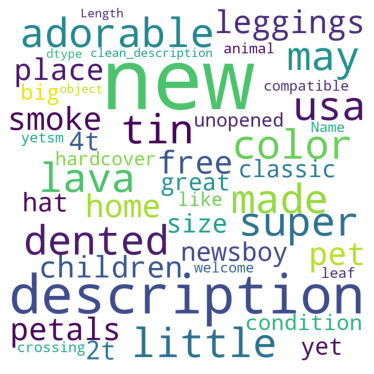

In [121]:
wordcloud_1 = WordCloud(width=800,height=800,background_color='white',
                       stopwords=stopwords,max_words=300,min_font_size=10
                       ).generate(''.join(str(price_first_quantile
                                             ['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

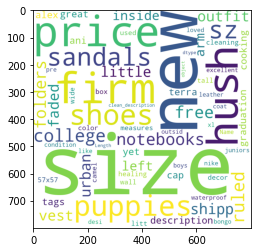

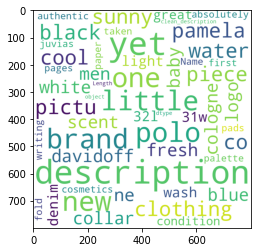

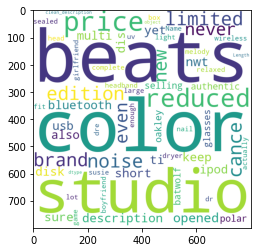

In [122]:
wordcloud_2 = WordCloud(width=800,height=800,background_color='white',
                       stopwords=stopwords,
                       max_words=300,min_font_size=10).generate(''.join(str(price_second_quantile['clean_description'])))
plt.imshow(wordcloud_2)
plt.show()

wordcloud_3 = WordCloud(width=800,height=800,background_color='white',
                       stopwords=stopwords,
                       max_words=300,min_font_size=10).generate(''.join(str(price_third_quantile['clean_description'])))
plt.imshow(wordcloud_3)
plt.show()

wordcloud_4 = WordCloud(width=800,height=800,background_color='white',
                       stopwords=stopwords,
                       max_words=300,min_font_size=10).generate(''.join(str(price_fourth_quantile['clean_description'])))
plt.imshow(wordcloud_4)
plt.show()


In [123]:
x_train_condition.shape

(1186028, 5)

In [124]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given,clean_description,price_q
183921,183921,Beats by Dr. Dre Studio Headphones,2,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,61.0,0,Limited Edition Color. Beats Studio -Noise Can...,electronics,"tv, audio & surveillance",headphones,Yes,limited edition color beats studio noise cance...,fourth_q
994585,994585,Hush Puppies Shoes Sandals 7.5 black low,3,Women/Shoes/Sandals,Hush Puppies,14.0,0,Price is firm. Hush Puppies Shoes Sandals Sz 7...,women,shoes,sandals,Yes,price firm hush puppies shoes sandals sz 7 5 l...,second_q
1032226,1032226,Discovering Psychology textbook,1,Other/Books/Education & Teaching,brand_unavailable,76.0,0,Brand new Never even opened NWT,other,books,education & teaching,No,brand new never even opened nwt,fourth_q
419291,419291,Crazy Aarons Thinking Putty,3,Kids/Toys/Arts & Crafts,brand_unavailable,10.0,1,Made in the USA. Super Lava Color. Tin may be ...,kids,toys,arts & crafts,No,made usa super lava color tin may little dented,first_q
941756,941756,Sunny Co. Pamela Suit in Black,1,Women/Swimwear/One-Piece,brand_unavailable,19.0,0,This is the Sunny Co. Clothing Pamela One-Piec...,women,swimwear,one-piece,No,sunny co clothing pamela one piece black pictu...,third_q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985416,985416,Juniors coat bongo brand fs,3,Women/Coats & Jackets/Jean Jacket,Bongo,13.0,1,Bongo coat Size xl Juniors leather like outsid...,women,coats & jackets,jean jacket,Yes,bongo coat size xl juniors leather like outsid...,second_q
289816,289816,Beats by Dr. Dre Studio 2.0 Wireless,1,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,189.0,0,Beats by Dr. Dre Studio 2.0 Wireless Headband ...,electronics,"tv, audio & surveillance",headphones,Yes,beats dr dre studio 2 0 wireless headband head...,fourth_q
99368,99368,Professional Style UV Light Nail Dryer,2,Beauty/Tools & Accessories/Nail Tools,brand_unavailable,45.0,1,Melody Susie UV Light Nail Dryer Large enough ...,beauty,tools & accessories,nail tools,No,melody susie uv light nail dryer large enough ...,fourth_q
1183292,1183292,Polo Wallet,1,Men/Men's Accessories/Wallets,Polo Ralph Lauren,25.0,0,No description yet,men,men's accessories,wallets,Yes,description yet,third_q


In [125]:
train.to_pickle('mercari_train')

In [126]:
pd.read_pickle('mercari_train')

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given,clean_description,price_q
183921,183921,Beats by Dr. Dre Studio Headphones,2,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,61.0,0,Limited Edition Color. Beats Studio -Noise Can...,electronics,"tv, audio & surveillance",headphones,Yes,limited edition color beats studio noise cance...,fourth_q
994585,994585,Hush Puppies Shoes Sandals 7.5 black low,3,Women/Shoes/Sandals,Hush Puppies,14.0,0,Price is firm. Hush Puppies Shoes Sandals Sz 7...,women,shoes,sandals,Yes,price firm hush puppies shoes sandals sz 7 5 l...,second_q
1032226,1032226,Discovering Psychology textbook,1,Other/Books/Education & Teaching,brand_unavailable,76.0,0,Brand new Never even opened NWT,other,books,education & teaching,No,brand new never even opened nwt,fourth_q
419291,419291,Crazy Aarons Thinking Putty,3,Kids/Toys/Arts & Crafts,brand_unavailable,10.0,1,Made in the USA. Super Lava Color. Tin may be ...,kids,toys,arts & crafts,No,made usa super lava color tin may little dented,first_q
941756,941756,Sunny Co. Pamela Suit in Black,1,Women/Swimwear/One-Piece,brand_unavailable,19.0,0,This is the Sunny Co. Clothing Pamela One-Piec...,women,swimwear,one-piece,No,sunny co clothing pamela one piece black pictu...,third_q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985416,985416,Juniors coat bongo brand fs,3,Women/Coats & Jackets/Jean Jacket,Bongo,13.0,1,Bongo coat Size xl Juniors leather like outsid...,women,coats & jackets,jean jacket,Yes,bongo coat size xl juniors leather like outsid...,second_q
289816,289816,Beats by Dr. Dre Studio 2.0 Wireless,1,"Electronics/TV, Audio & Surveillance/Headphones",Beats by Dr. Dre,189.0,0,Beats by Dr. Dre Studio 2.0 Wireless Headband ...,electronics,"tv, audio & surveillance",headphones,Yes,beats dr dre studio 2 0 wireless headband head...,fourth_q
99368,99368,Professional Style UV Light Nail Dryer,2,Beauty/Tools & Accessories/Nail Tools,brand_unavailable,45.0,1,Melody Susie UV Light Nail Dryer Large enough ...,beauty,tools & accessories,nail tools,No,melody susie uv light nail dryer large enough ...,fourth_q
1183292,1183292,Polo Wallet,1,Men/Men's Accessories/Wallets,Polo Ralph Lauren,25.0,0,No description yet,men,men's accessories,wallets,Yes,description yet,third_q


In [127]:
test.to_pickle('mercari_test')

In [128]:
pd.read_pickle('mercari_test')

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given,clean_description
1018027,1018027,Makeup Bundle Set,1,Beauty/Makeup/Makeup Sets,brand_unavailable,20.0,1,New Makeup Bundle set !,beauty,makeup,makeup sets,Yes,new makeup bundle set
1130224,1130224,VS PINK BLING HOODIE,2,Women/Sweaters/Full Zip,pink,26.0,0,LIKE NEW. VS PINK BLING HOODIE. NO MISSING SEQ...,women,sweaters,full zip,Yes,like new vs pink bling hoodie missing sequins ...
1170083,1170083,Blue Haze Slime (4oz),1,Kids/Toys/Arts & Crafts,brand_unavailable,3.0,1,Blue Haze Thick milky Slime with blue coloring...,kids,toys,arts & crafts,Yes,blue haze thick milky slime blue coloring 4oz ...
716488,716488,Ear/Nose Piercing Kit,1,Women/Jewelry/Earrings,brand_unavailable,19.0,0,"Brand new, never used. Kit includes -piercing ...",women,jewelry,earrings,Yes,brand new never used kit includes piercing gun...
760830,760830,Nintendo DS - Lego Star Wars Saga,3,Electronics/Video Games & Consoles/Games,nintendo,10.0,0,Nintendo DS - Lego Star Wars the Complete Saga...,electronics,video games & consoles,games,Yes,nintendo ds lego star wars complete saga great...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790964,790964,RESERVED FOR SRAM12,1,Women/Dresses/Knee-Length,brand_unavailable,11.0,1,The colors in this unique boho dress are beaut...,women,dresses,knee-length,Yes,colors unique boho dress beautiful dress high ...
1097849,1097849,Yeti Mic,3,NaN,brand_unavailable,79.0,0,coming with and arm the original stand and box...,category unknown,category unknown,category unknown,Yes,coming arm original stand box instructions goi...
370076,370076,"Koko lashes in ""Goddess""",1,Beauty/Makeup/Eyes,brand_unavailable,34.0,1,"3 ""Goddess"" koko lashes. Brand new, never been...",beauty,makeup,eyes,Yes,3 goddess koko lashes brand new never used
160067,160067,Tiffany Somerset bracelet,2,Women/Jewelry/Bracelets,tiffany & co.,134.0,0,"7"" not adjustable sterling Silver. Lightly use...",women,jewelry,bracelets,Yes,7 adjustable sterling silver lightly used howe...


In [129]:
x_train, x_test = train.drop(['price'],axis=1), test.drop(['price'],axis=1)
y_train, y_test = train['price'], test['price']
                                                          

In [130]:
x_test

,train_id,name,item_condition_id,category_name,brand_name,shipping,item_description,main_cat,subcat_1,subcat_2,brand_name_given,clean_description
1018027,1018027,Makeup Bundle Set,1,Beauty/Makeup/Makeup Sets,brand_unavailable,1,New Makeup Bundle set !,beauty,makeup,makeup sets,Yes,new makeup bundle set
1130224,1130224,VS PINK BLING HOODIE,2,Women/Sweaters/Full Zip,pink,0,LIKE NEW. VS PINK BLING HOODIE. NO MISSING SEQ...,women,sweaters,full zip,Yes,like new vs pink bling hoodie missing sequins ...
1170083,1170083,Blue Haze Slime (4oz),1,Kids/Toys/Arts & Crafts,brand_unavailable,1,Blue Haze Thick milky Slime with blue coloring...,kids,toys,arts & crafts,Yes,blue haze thick milky slime blue coloring 4oz ...
716488,716488,Ear/Nose Piercing Kit,1,Women/Jewelry/Earrings,brand_unavailable,0,"Brand new, never used. Kit includes -piercing ...",women,jewelry,earrings,Yes,brand new never used kit includes piercing gun...
760830,760830,Nintendo DS - Lego Star Wars Saga,3,Electronics/Video Games & Consoles/Games,nintendo,0,Nintendo DS - Lego Star Wars the Complete Saga...,electronics,video games & consoles,games,Yes,nintendo ds lego star wars complete saga great...
...,...,...,...,...,...,...,...,...,...,...,...,...
790964,790964,RESERVED FOR SRAM12,1,Women/Dresses/Knee-Length,brand_unavailable,1,The colors in this unique boho dress are beaut...,women,dresses,knee-length,Yes,colors unique boho dress beautiful dress high ...
1097849,1097849,Yeti Mic,3,NaN,brand_unavailable,0,coming with and arm the original stand and box...,category unknown,category unknown,category unknown,Yes,coming arm original stand box instructions goi...
370076,370076,"Koko lashes in ""Goddess""",1,Beauty/Makeup/Eyes,brand_unavailable,1,"3 ""Goddess"" koko lashes. Brand new, never been...",beauty,makeup,eyes,Yes,3 goddess koko lashes brand new never used
160067,160067,Tiffany Somerset bracelet,2,Women/Jewelry/Bracelets,tiffany & co.,0,"7"" not adjustable sterling Silver. Lightly use...",women,jewelry,bracelets,Yes,7 adjustable sterling silver lightly used howe...


In [131]:
x_train_condition,x_test_condition = onehot_encoding('item_condition_id')
print(x_train_condition.shape,x_test_condition.shape)

(1186028, 5) (296507, 5)


In [132]:
x_train_brand, x_test_brand = onehot_encoding('brand_name')
x_train_brand_given, x_test_brand_given = onehot_encoding('brand_name_given')
x_train_condition, x_test_condition = onehot_encoding('item_condition_id')
x_train_shipping, x_test_shipping = onehot_encoding('shipping')
x_train_main_cat, x_test_main_cat = onehot_encoding('main_cat')
x_train_subcat_1, x_test_subcat_1 = onehot_encoding('subcat_1')
x_train_subcat_2, x_test_subcat_2 = onehot_encoding('subcat_2')

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(min_df=10, ngram_range=(1,2),binary=True)
x_train_bow_desc = bow.fit_transform(x_train['clean_description'])
x_test_bow_desc = bow.fit_transform(x_test['clean_description'])
features_list.extend(bow.get_feature_names())
len(features_list)

NameError: name 'features_list' is not defined

In [ ]:
from scipy.sparse import hstack
x_train_final = hstack((x_train_brand, x_train_brand_given, x_train_condition, x_train_shipping, x_train_main_cat, x_train_subcat_1, x_train_subcat_2, x_train_bow_desc))
x_train_final.shape

In [ ]:
x_test_final = hstack((x_test_brand, x_test_brand_given, x_test_condition, x_test_shipping, x_test_main_cat, x_test_subcat_1, x_test_subcat_2, x_test_bow_desc))

In [ ]:
x_test_final.shape